## Reto: Los deportistas mejor pagados

In [13]:
import pandas as pd
import matplotlib.pyplot as plt;
import seaborn as sns
import numpy as np

In [16]:
deportistas_df = pd.read_csv('forbes_richest_atheletes.csv')
deportistas_df

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5


In [3]:
deportistas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


### Deportistas cuyo ranking ha subido al menos dos lugares entre 2010 y 2020.

### Atleta con el menor número de apariciones y mayores ganancias.

In [83]:
deportistas_copy = deportistas_df.copy()

In [84]:
deportistas_copy2= deportistas_copy.groupby(['Name']).size().reset_index(name= 'Appearances')
deportistas_copy2 = deportistas_copy2.sort_values('Appearances')
deportistas_copy2

,Name,Appearances
0,Aaron Rodgers,1
22,Eli Manning,1
23,Emmit Smith,1
26,Gary Sheffield,1
61,Novak Djokovic,1
...,...,...
54,Michael Schumacher,13
45,LeBron James,13
43,Kobe Bryant,14
52,Michael Jordan,19


In [85]:
deportistas_copy2_2= deportistas_copy.groupby(['Name'])['earnings ($ million)'].agg('sum').reset_index(name= 'Total_million')
deportistas_copy2_2 = deportistas_copy2_2.sort_values('Total_million', ascending= False)
deportistas_copy2_2

,Name,Total_million
78,Tiger Woods,1373.8
45,LeBron James,844.8
25,Floyd Mayweather,840.0
14,Cristiano Ronaldo,787.1
68,Roger Federer,781.1
...,...,...
12,Cecil Fielder,12.7
53,Michael Moorer,12.1
20,"Donovan ""Razor"" Ruddock",10.2
30,Greg Norman,8.5


In [86]:
deportistas_copy2_3 = pd.merge(deportistas_copy2, deportistas_copy2_2, how= 'inner', on= 'Name').sort_values('Total_million', ascending=False)
deportistas_copy2_3

,Name,Appearances,Total_million
81,Tiger Woods,19,1373.8
78,LeBron James,13,844.8
64,Floyd Mayweather,5,840.0
74,Cristiano Ronaldo,10,787.1
76,Roger Federer,12,781.1
...,...,...,...
32,Cecil Fielder,1,12.7
12,Michael Moorer,1,12.1
18,"Donovan ""Razor"" Ruddock",1,10.2
9,Monica Seles,1,8.5


In [87]:
deportistas_copy2_3['Razon']= (deportistas_copy2_3['Total_million']) / (deportistas_copy2_3['Appearances'])
deportistas_copy2_3

,Name,Appearances,Total_million,Razon
81,Tiger Woods,19,1373.8,72.305263
78,LeBron James,13,844.8,64.984615
64,Floyd Mayweather,5,840.0,168.000000
74,Cristiano Ronaldo,10,787.1,78.710000
76,Roger Federer,12,781.1,65.091667
...,...,...,...,...
32,Cecil Fielder,1,12.7,12.700000
12,Michael Moorer,1,12.1,12.100000
18,"Donovan ""Razor"" Ruddock",1,10.2,10.200000
9,Monica Seles,1,8.5,8.500000


In [88]:
#Buscando la cantidad maxima de ganancias
deportistas_copy2_3['Razon'].max()

168.0

In [89]:
deportistas_copy2_3[deportistas_copy2_3['Razon'] == 168.0]

,Name,Appearances,Total_million,Razon
64,Floyd Mayweather,5,840.0,168.0


### Deporte y país con mayor número de atletas no rankeados que entraron en la lista de atletas mejor pagados.

### País con mayor número de deportes con atletas en el dataset.

In [79]:

df_by_sport = deportistas_df[['Nationality','Sport', 'Name']].copy()
df_by_sport['Sport'] = df_by_sport['Sport'].str.lower()
#Eliminando nombres de atletas duplicados para despues dejar en el dataframe los paises con deportes unicos
df_by_sport = df_by_sport.drop_duplicates(subset=['Name'])
df_by_sport = df_by_sport.drop_duplicates(subset=['Sport','Nationality'])
df_by_sport = df_by_sport.drop('Name',1)
df_by_sport

C:\Users\rodol\AppData\Local\Temp\ipykernel_2092\480574622.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_by_sport = df_by_sport.drop('Name',1)


,Nationality,Sport
0,USA,boxing
3,Brazil,auto racing
4,France,auto racing
5,USA,golf
6,Australia,golf
7,USA,basketball
16,Canada,boxing
18,UK,auto racing
25,USA,tennis
26,USA,nfl


In [80]:
#Agrupando por nacionalidad
df_by_sport.groupby(['Nationality'])['Nationality'].count().reset_index(name="NumSports")



,Nationality,NumSports
0,Argentina,1
1,Australia,1
2,Austria,1
3,Brazil,2
4,Canada,4
5,Finland,1
6,France,1
7,Germany,1
8,Ireland,1
9,Italy,1


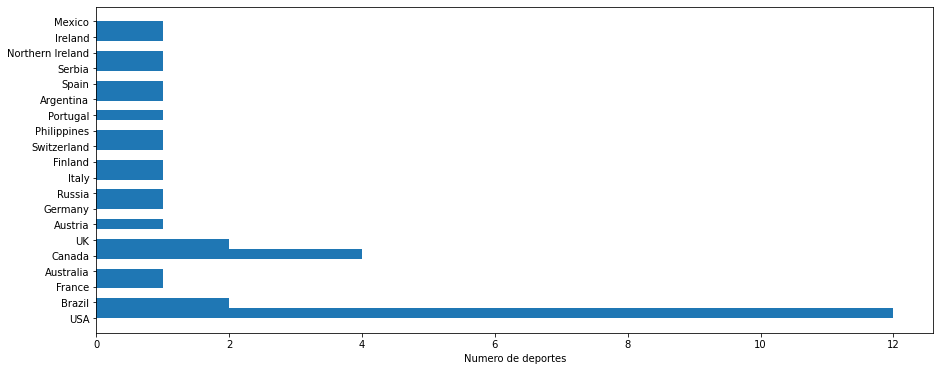

In [81]:
f, axes = plt.subplots(figsize=(15,6))
plt.hist(df_by_sport['Nationality'], bins=30, orientation='horizontal')
plt.xlabel('Numero de deportes')
plt.show()

#### El pais con mayor numero de atletas es: USA

### ¿Cuántos atletas por deporte tiene cada país?

In [ ]:
#listo

### Ganancia mínima y máxima (dentro del dataset) por deporte y por país.

In [78]:
df_earnings_min_max = deportistas_df[['Nationality','Sport', 'earnings ($ million)']].copy()
df_earnings_min_max = df_earnings_min_max.rename(columns = {'earnings ($ million)':'earnings'})
df_earnings_min_max = df_earnings_min_max.groupby(['Sport','Nationality'])['earnings'].sum().reset_index()



,Sport,Nationality,earnings
0,American Football,USA,901.2
1,American Football / Baseball,USA,22.5
2,Auto Racing,Austria,13.5
3,Auto Racing,Brazil,22.0
4,Auto Racing,Canada,43.0
5,Auto Racing,France,16.0
6,Auto Racing,Germany,108.0
7,Auto Racing,UK,25.8
8,Auto Racing,USA,26.5
9,Auto Racing (Nascar),USA,44.5


### Atleta con mayores ganancias por deporte por década

In [ ]:
#listo

### Ganancia total por cada deporte por cada año.

In [82]:
df_earnings = deportistas_df[['Sport','Year', 'earnings ($ million)']].copy()
df_earnings['Sport'] = df_earnings['Sport'].str.lower()
df_earnings = df_earnings.rename(columns = {'earnings ($ million)':'earnings'})
df_earnings = df_earnings.groupby(['Sport','Year'])['earnings'].sum().reset_index()
df_earnings

,Sport,Year,earnings
0,american football,2004,42.0
1,american football,2005,37.5
2,american football,2006,29.0
3,american football,2010,78.2
4,american football,2012,42.4
...,...,...,...
171,tennis,2016,123.6
172,tennis,2017,64.0
173,tennis,2018,77.2
174,tennis,2019,93.4
